In [48]:
"""""Dado el problema de los registros para el equipo de crédito, se infiere se puede automatizar un modelo para obtener un criterio para decidir si prestarle o no a la persona; 
por consiguiente este ejercicio es una aproximación de aprendizaje de máquina supervisado para obtener un juicio. El punto de vista del presente trabajo parte de la siguiente
tesis: Lograr clasificar a las personas mediante un umbral de una tasa de pago de sus créditos. Se considera una buena idea porque hay una evidencia en datos, no obstante,
sería un mejor modelo si hubiera datos referentes a lo que el individuo ha pagado en ese tiempo. Así, no se tendría que inferir con las mismas variables del dataset; 
se podría crear una tasa de pago más precisa sin supuestos. A continuación se presenta la línea de código:"""
#Importación de los datos
import pandas as pd
import os
path=os.getcwd()
file_name='/datos_prestamo.csv'
path_name=path+file_name
df_org = pd.read_csv(path_name)

In [49]:
df_org.head()

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina


In [50]:
df_org.groupby('Estatus_prestamo')['Id'].count()

Estatus_prestamo
No    117
Si    440
Name: Id, dtype: int64

In [51]:
df_org['Estatus_prestamo']=df_org['Estatus_prestamo'].map({'Si':1, 'No':0}).astype(int)

In [52]:
#Limpieza de la columna Dependientes y una vista rápida de las demás 
df_org['Dependientes'] = df_org['Dependientes'].str.strip('+')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            557 non-null    int64  
 1   Fecha_registro        557 non-null    object 
 2   Fecha_contacto        557 non-null    object 
 3   Id                    557 non-null    object 
 4   Genero                545 non-null    object 
 5   Casado                554 non-null    object 
 6   Dependientes          544 non-null    object 
 7   Educacion             557 non-null    object 
 8   Trabaja_para_el       530 non-null    object 
 9   Salario               557 non-null    int64  
 10  Salario_Pareja        557 non-null    float64
 11  Credito_pedido        536 non-null    float64
 12  Plazo_prestamo        544 non-null    float64
 13  Historial_crediticio  510 non-null    float64
 14  Area_vivienda         557 non-null    object 
 15  Estatus_prestamo      5

In [53]:
#Cambio de las fechas
import datetime as dt
df_org['Fecha_registro'] = pd.to_datetime(df_org['Fecha_registro'],infer_datetime_format=True).dt.date
df_org['Fecha_contacto'] = pd.to_datetime(df_org['Fecha_contacto'],infer_datetime_format=True).dt.date

<AxesSubplot:>

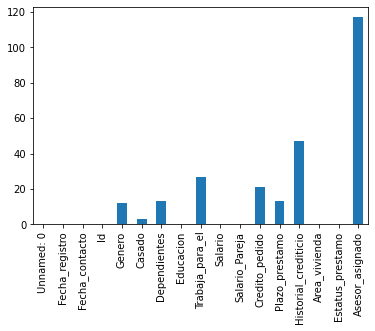

In [54]:
#Resumen de los valores nulos por columna 
df_org.isna().sum().plot(kind='bar')

In [55]:
#Cambio de la columna para un mejor estudio
df_org['Trabaja_para_el']=df_org['Trabaja_para_el'].map({'Si':1, 'No':0}).dropna().astype(int)

In [56]:
df_org['Genero']=df_org['Genero'].map({'Hombre':1, 'Mujer':0}).dropna().astype(int)

In [57]:
df_org['Casado']=df_org['Casado'].map({'Si':1, 'No':0}).dropna().astype(int)

In [58]:
#Cambio de la columna para poder contabilizarla como dummy y un mejor estudio
import numpy as np
df_org['Dependientes'] = df_org['Dependientes'].astype('float')
df_org['Dependientes'] = df_org['Dependientes'] >= 1
df_org['Dependientes'] = df_org['Dependientes'].replace(np.nan, 0).astype(int)


In [59]:
#Cambio de ruta de la columna para su estudio
ruta = {'Graduado':1, 'No Graduado':0}

df_org['Educacion'] = df_org['Educacion'].map(ruta).fillna(0).astype(int)

In [60]:
#Cambio de la columna para un mejor estudio
import  numpy as np
df_org['Historial_crediticio'] = df_org['Historial_crediticio'].dropna().astype(int)

In [61]:
df_org['Area_vivienda'] = df_org['Area_vivienda'].astype('category')


In [62]:
#Vista rápida de las columnas y su tipo
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            557 non-null    int64   
 1   Fecha_registro        557 non-null    object  
 2   Fecha_contacto        557 non-null    object  
 3   Id                    557 non-null    object  
 4   Genero                545 non-null    float64 
 5   Casado                554 non-null    float64 
 6   Dependientes          557 non-null    int32   
 7   Educacion             557 non-null    int32   
 8   Trabaja_para_el       530 non-null    float64 
 9   Salario               557 non-null    int64   
 10  Salario_Pareja        557 non-null    float64 
 11  Credito_pedido        536 non-null    float64 
 12  Plazo_prestamo        544 non-null    float64 
 13  Historial_crediticio  510 non-null    float64 
 14  Area_vivienda         557 non-null    category
 15  Estatu

In [63]:
df_org.head() 

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,2019-02-26,2019-02-27,LP002519,1.0,1.0,1,1,0.0,4691,0.0,100.0,360.0,1.0,Semiurbana,1,Dudley
1,1,2019-02-27,2019-02-26,LP001280,1.0,1.0,1,0,0.0,3333,2000.0,99.0,360.0,NaN,Semiurbana,1,Pablo
2,2,2019-02-27,2019-02-28,LP001151,0.0,0.0,0,1,0.0,4000,2275.0,144.0,360.0,1.0,Semiurbana,1,Dudley
3,3,2019-02-28,2019-03-01,LP002036,1.0,1.0,0,1,0.0,2058,2134.0,88.0,360.0,NaN,Urabana,1,Ana
4,4,2019-02-26,2019-02-27,LP002894,0.0,1.0,0,1,0.0,3166,0.0,36.0,360.0,1.0,Semiurbana,1,Regina


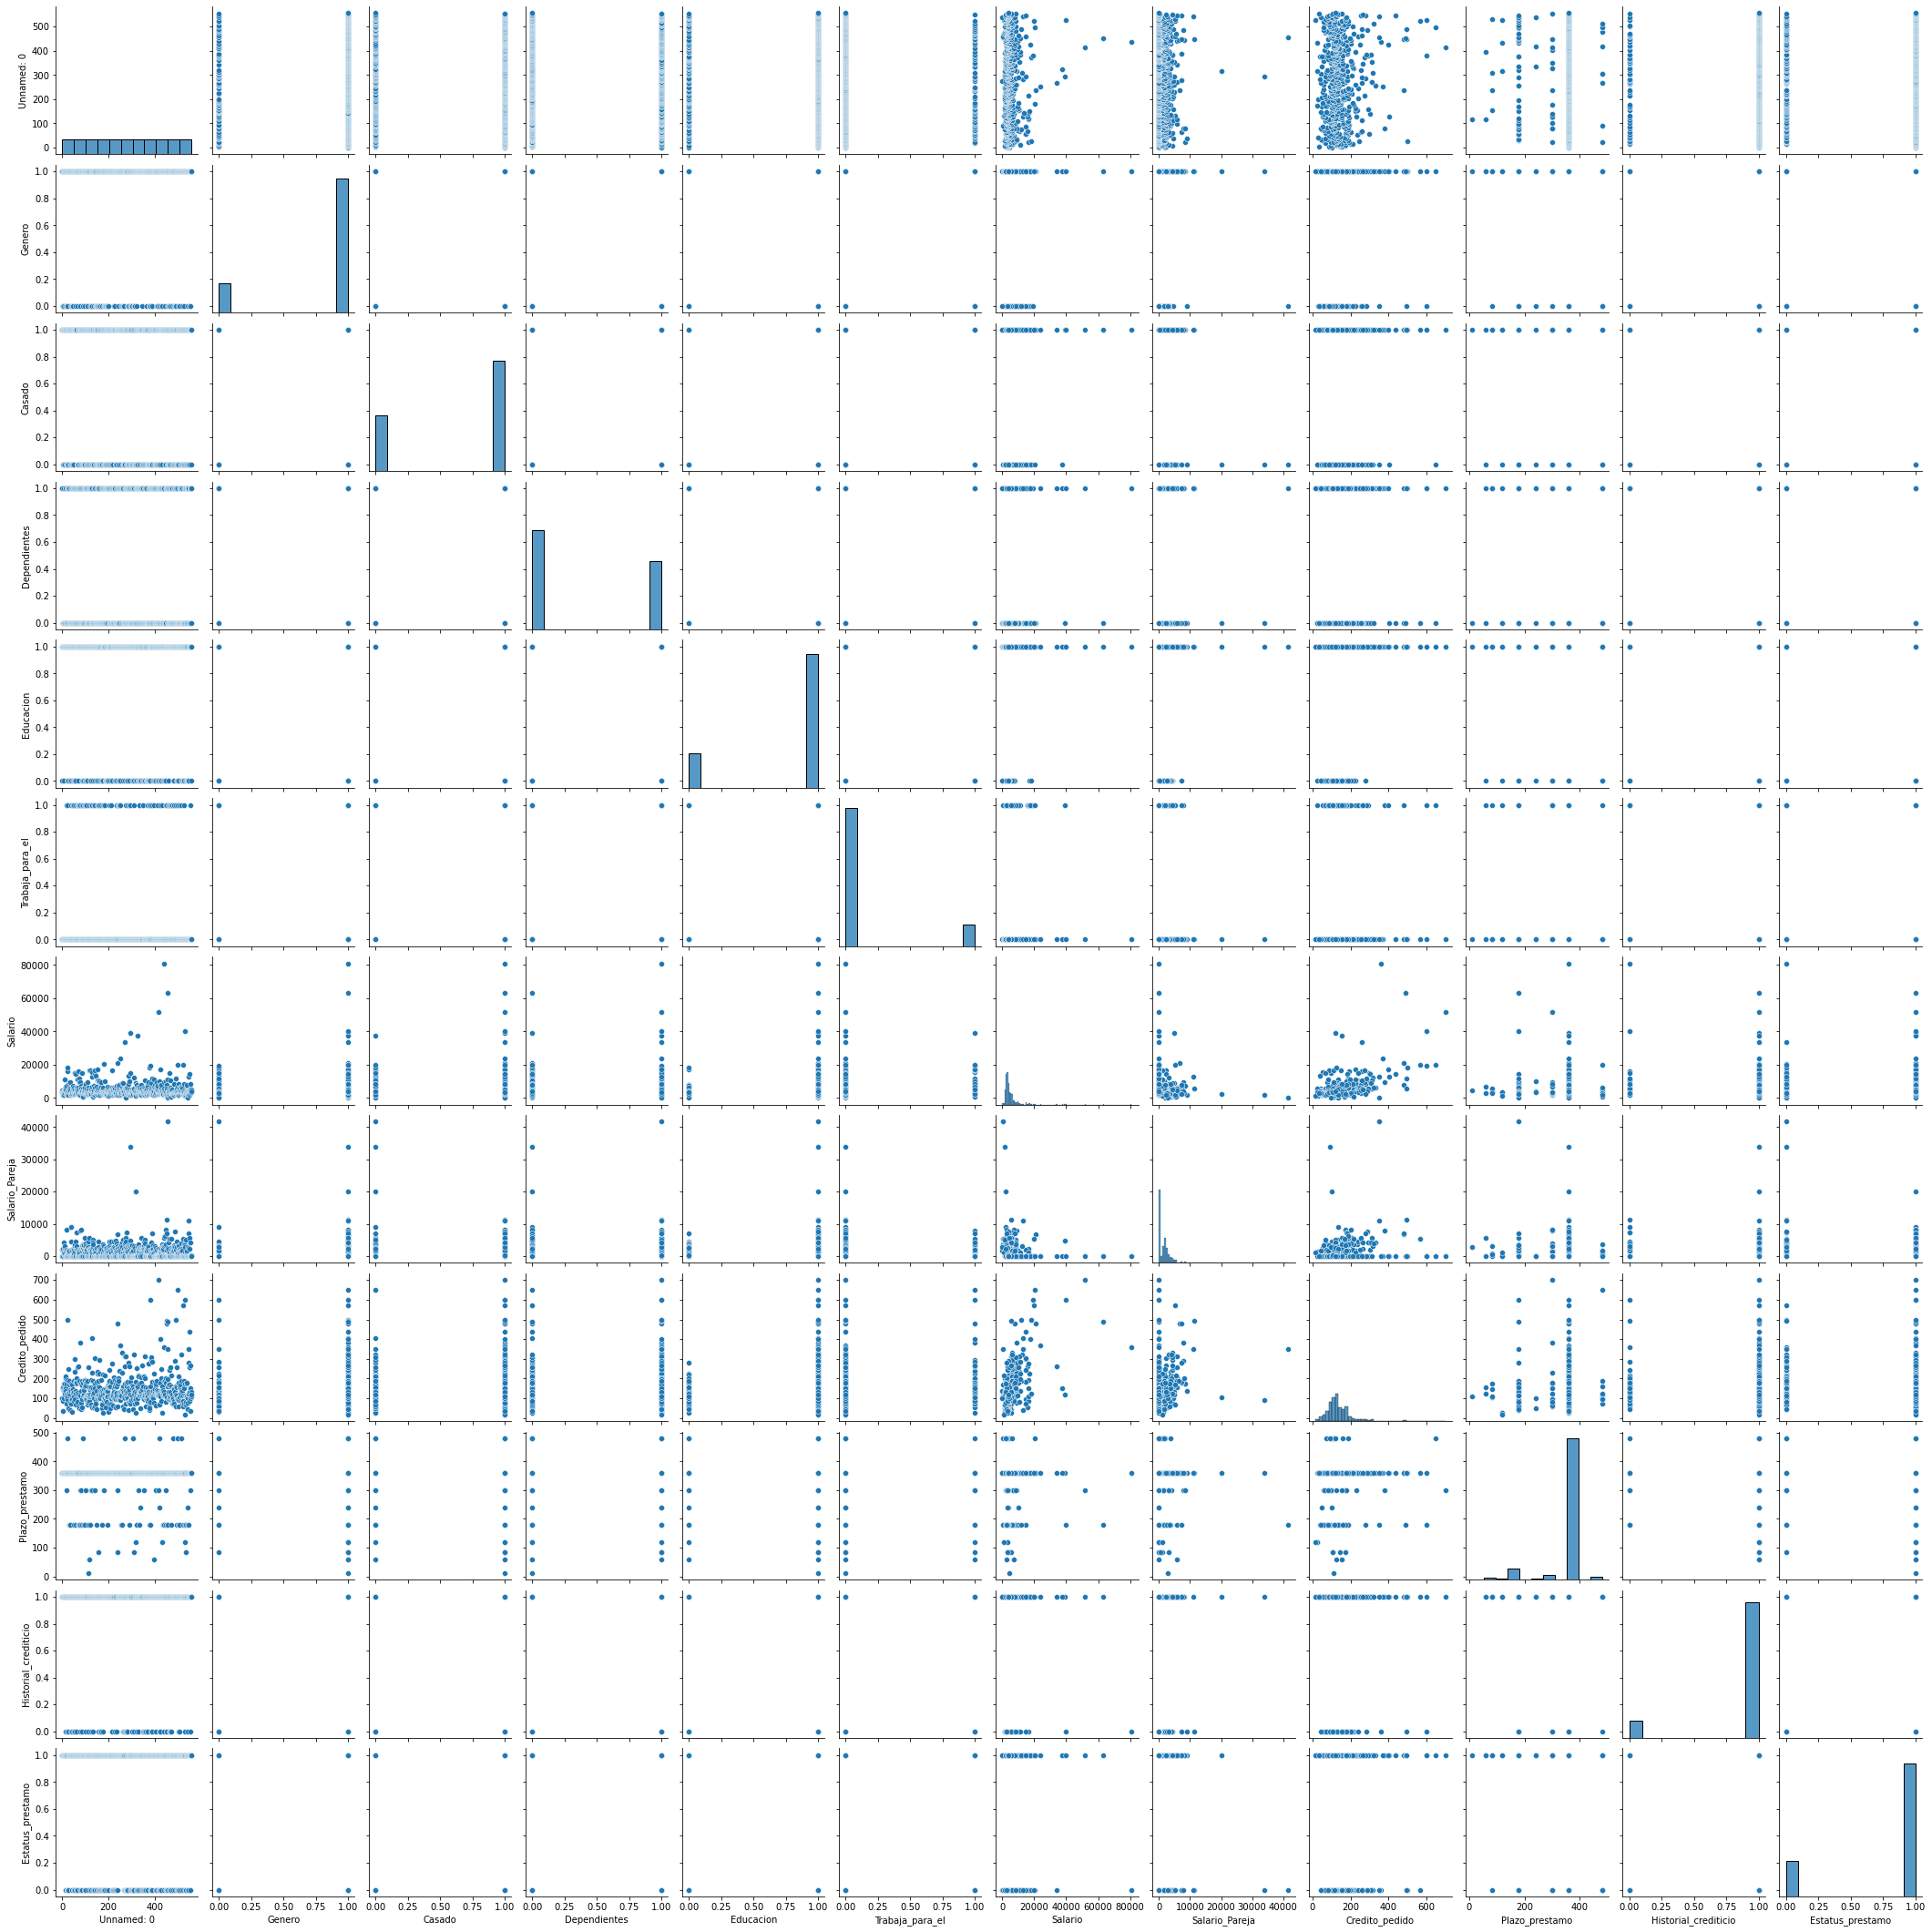

In [64]:
#Análisis  de datos exploratorio de las variables a través de múltiplos pequeños para visualizar distribuciones univariadas de todas las variables en el dataset y 
# sus relaciones por pareja
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_org)
plt.show()

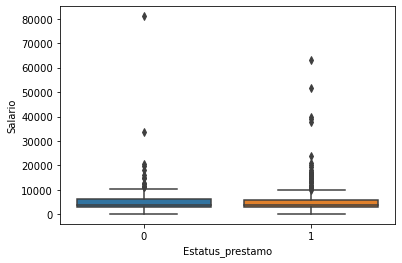

In [65]:
#Relación conjunta de las variables del salario y estatus
sns.boxplot(data=df_org, x="Estatus_prestamo", y="Salario")
plt.show()

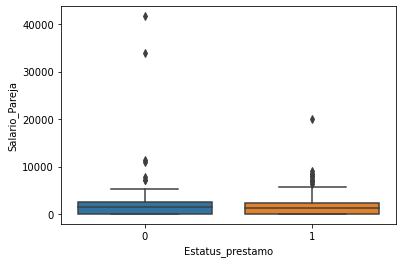

In [66]:
#Exploración de la relación entre variables
_ = sns.boxplot(data=df_org, y="Salario_Pareja", x="Estatus_prestamo")
plt.show()

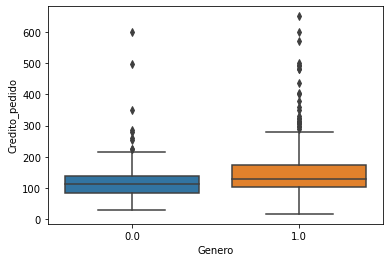

In [67]:
_ = sns.boxplot(data=df_org, y="Credito_pedido", x="Genero")
plt.show()

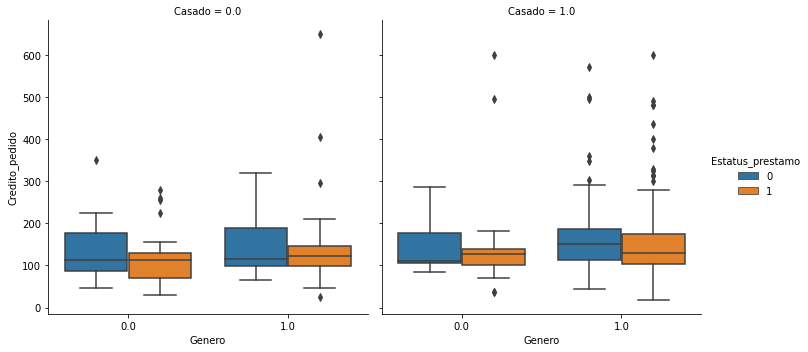

In [68]:
#Exploración de la relación entre variable
sns.catplot(x="Genero", y="Credito_pedido",data=df_org,kind='box',hue='Estatus_prestamo', col='Casado')
plt.show()

In [69]:
pip install empiricaldist


Note: you may need to restart the kernel to use updated packages.


In [70]:
#Exploración de las correlaciones
print(df_org.corr())

                      Unnamed: 0    Genero    Casado  Dependientes  Educacion  \
Unnamed: 0              1.000000  0.079522 -0.007644      0.021936  -0.049122   
Genero                  0.079522  1.000000  0.353907      0.148450  -0.029660   
Casado                 -0.007644  0.353907  1.000000      0.338243  -0.021504   
Dependientes            0.021936  0.148450  0.338243      1.000000  -0.066386   
Educacion              -0.049122 -0.029660 -0.021504     -0.066386   1.000000   
Trabaja_para_el        -0.040576 -0.018590 -0.006593      0.066805   0.008249   
Salario                 0.036747  0.046423  0.055703      0.103036   0.133697   
Salario_Pareja          0.042251  0.081428  0.053971     -0.016469   0.060347   
Credito_pedido          0.106058  0.100814  0.144341      0.153757   0.156270   
Plazo_prestamo         -0.005741 -0.075621 -0.123890     -0.106550   0.065524   
Historial_crediticio   -0.006780 -0.014589 -0.023407     -0.037670   0.109946   
Estatus_prestamo       -0.00

<AxesSubplot:>

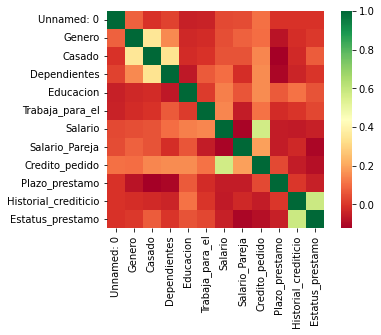

In [71]:
#Representación gráfica de las correlaciones
sns.heatmap(df_org.corr(), square=True, cmap='RdYlGn')

In [72]:
# Comienza la definición de la variable objetivo (target)
y = df_org['Estatus_prestamo'] 



In [73]:
#Comportamiento de la variable target
y.describe()

count    557.000000
mean       0.789946
std        0.407713
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Estatus_prestamo, dtype: float64

In [74]:
#Definición de los features (x), con las cuales se calibrarán el modelo de aprendizaje de máquina.
col_feat = ["Dependientes","Salario","Salario_Pareja", "Credito_pedido","Educacion","Trabaja_para_el","Genero","Plazo_prestamo","Historial_crediticio"]
x = df_org[col_feat] 

In [75]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
#Se hace una corroboración de la limpieza de los datos antes de su análisis, se crea el imputer para hacer una deducción de los valores faltantes y llenarlos con el promedio
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x)
X = imp.transform(x)

In [77]:
#Creando el setup de una Regresión Logística a través de una pipeline, así se transforma y se estandarizan los datos. Es decir, todos los datos se centran en cero, y se tiene una 
# varianza de 1 para un mejor manejo
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=8)

In [78]:
#Visualización de los parámetros del pipeline
print(pipeline.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('logreg', LogisticRegression())], 'verbose': False, 'scaler': StandardScaler(), 'logreg': LogisticRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'logreg__C': 1.0, 'logreg__class_weight': None, 'logreg__dual': False, 'logreg__fit_intercept': True, 'logreg__intercept_scaling': 1, 'logreg__l1_ratio': None, 'logreg__max_iter': 100, 'logreg__multi_class': 'auto', 'logreg__n_jobs': None, 'logreg__penalty': 'l2', 'logreg__random_state': None, 'logreg__solver': 'lbfgs', 'logreg__tol': 0.0001, 'logreg__verbose': 0, 'logreg__warm_start': False}


In [79]:
#Crear hiperparámetros para el Grid para así hacer tuning de los mejores parámetros de alpha de la regresión logística
c_space = np.logspace(-5, 8, 15)
param_grid = {'logreg__C': c_space}


In [80]:
#Creación de la regresión 
gm_cv = GridSearchCV(pipeline,param_grid=param_grid,cv=3,n_jobs=-1)

In [81]:
#Fit al set de entrenamiento
gm_cv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [82]:
#Predicción sobre el set de prueba
y_pred = gm_cv.predict(X_test)

In [83]:
#Obtención del parámtro de precisión de la regresión
from sklearn.metrics import accuracy_score
acc_scrf = accuracy_score(y_test,y_pred)
print("Puntuación de Precisión {}".format(acc_scrf))

Puntuación de Precisión 0.9071428571428571


In [84]:
#Obtención de los mejores parámetros
best_hyperparms = gm_cv.best_params_ 
print('Mejores hiperparámetros :\n', best_hyperparms)

Mejores hiperparámetros :
 {'logreg__C': 0.05179474679231213}


In [85]:
#Obtención del score 
best_score = gm_cv.best_score_
print('Mejor score :\n', best_score)

Mejor score :
 0.8561151079136691


In [86]:
#Creación del reporte de clasificación
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.43      0.61        23\n           1       0.90      1.00      0.95       117\n\n    accuracy                           0.91       140\n   macro avg       0.95      0.72      0.78       140\nweighted avg       0.92      0.91      0.89       140\n'

In [87]:
#Conformación de la matriz de confusión, para la obtención de los Ciertos positivos, falsos negativos, falsos positivos y falsos negativos.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 10,  13],
       [  0, 117]], dtype=int64)

In [88]:
#Obtención de la R2 pertinente a la regresión
r2 = gm_cv.score(X_test, y_test)
print("Tuned Regresión Logística R cuadrada: {}".format(r2))

Tuned Regresión Logística R cuadrada: 0.9071428571428571


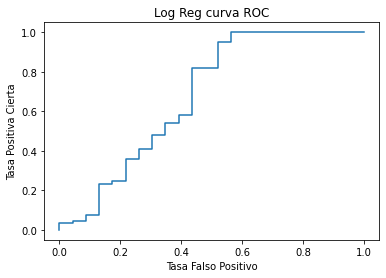

In [89]:
#Creación de la curva Característica Operativa del Receptor, para la obtención de la sensibilidad de todos los posibles puntos del umbral 
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = gm_cv.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel("Tasa Falso Positivo")
plt.ylabel("Tasa Positiva Cierta")
plt.title("Log Reg curva ROC")
plt.show()

In [90]:
#Obtención del área debajo de la curva ROC
roc_score = roc_auc_score(y_test,y_pred_proba)
print("Score ROC {}".format(roc_score))

Score ROC 0.6778149386845039


In [91]:
#Aunque se obtiene un buen rendimiento con la regresión, se propone conformar un segundo modelo Random Forest. Se utiliza este modelo por su manejo de las varianzas de los datos
from sklearn.ensemble import RandomForestClassifier
steps2 = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]
pipeline2 = Pipeline(steps2)

In [92]:
#Tuning de los parámetros del modelo y su prueba con el set de entrenamiento del modelo
params_rf = {'rf__n_estimators':[100,200,300], 'rf__max_depth': [4,6,8], 'rf__min_samples_leaf': [0.04,0.06,0.08], 'rf__max_features': ['auto','sqrt']}
grid_rf = GridSearchCV(pipeline2, param_grid=params_rf, cv = 3, scoring='neg_mean_squared_error', verbose = 1, n_jobs = -1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [4, 6, 8],
                         'rf__max_features': ['auto', 'sqrt'],
                         'rf__min_samples_leaf': [0.04, 0.06, 0.08],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
#Obtención de los mejores hiperparámetros
best_hyperf = grid_rf.best_params_
print('Mejor hiperparámetros :\n', best_hyperf)

Mejor hiperparámetros :
 {'rf__max_depth': 4, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 0.04, 'rf__n_estimators': 300}


In [94]:
#Obtención del mejor modelo random forest para poder hacer una predicción sobre el test de prueba
best_model = grid_rf.best_estimator_
y_predrf = best_model.predict(X_test)

In [95]:
#Reporte de clasificación 
classification_report(y_test, y_predrf)

'              precision    recall  f1-score   support\n\n           0       1.00      0.39      0.56        23\n           1       0.89      1.00      0.94       117\n\n    accuracy                           0.90       140\n   macro avg       0.95      0.70      0.75       140\nweighted avg       0.91      0.90      0.88       140\n'

In [96]:
#Conformación de la matriz de confusión
confusion_matrix(y_test,y_predrf)

array([[  9,  14],
       [  0, 117]], dtype=int64)

In [97]:
#Obtención de la precisión del modelo Random Forest
from sklearn.metrics import accuracy_score
acc_scrf = accuracy_score(y_test,y_predrf)
print("Puntuación de Precisión {}".format(acc_scrf))

Puntuación de Precisión 0.9


In [98]:
""""Con los resultados obtenidos en el anterior ejercicio se observó el buen rendimiento de la Regresión Logística dado el problema, contó con los mejores resultados
para la predicción a que individuos prestar dinero. Al superar el umbral propuesto, se puede inferir la posibilidad de pago. No obstante, como se menciono al inicio
del ejercicio con más features se podría hacer un mejor ejercicio tales cómo el comportamiento del gasto, datos de pago, entre otros. """

'"Con los resultados obtenidos en el anterior ejercicio se observó el buen rendimiento de la Regresión Logística dado el problema, contó con los mejores resultados\npara la predicción a que individuos prestar dinero. Al superar el umbral propuesto, se puede inferir la posibilidad de pago. No obstante, como se menciono al inicio\ndel ejercicio con más features se podría hacer un mejor ejercicio tales cómo el comportamiento del gasto, datos de pago, entre otros. '